In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

In [4]:
# Importing the dataset
dataset = pd.read_csv('kmeans_blobs.csv')
dataset.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


In [5]:
#extract x and y from the dataset and convert them to numpy arrays
x = dataset['x'].values
y = dataset['y'].values
data =np.array( list(zip(x,y)))
print(data)

[[24.412 32.932]
 [35.19  12.189]
 [26.288 41.718]
 [ 0.376 15.506]
 [26.116  3.963]
 [25.893 31.515]
 [23.606 15.402]
 [28.026 15.47 ]
 [26.36  34.488]
 [23.013 36.213]
 [27.819 41.867]
 [39.634 42.23 ]
 [35.477 35.104]
 [25.768  5.967]
 [-0.684 21.105]
 [ 3.387 17.81 ]
 [32.986  3.412]
 [34.258  9.931]
 [ 6.313 29.426]
 [33.899 37.535]
 [ 4.718 12.125]
 [21.054  5.067]
 [ 3.267 21.911]
 [24.537 38.822]
 [ 4.55  16.179]
 [25.712  7.409]
 [ 3.884 28.616]
 [29.081 34.539]
 [14.943 23.263]
 [32.169 45.421]
 [32.572 16.944]
 [33.673 13.163]
 [29.189 13.226]
 [25.994 34.444]
 [16.513 23.396]
 [23.492 11.142]
 [26.878 36.609]
 [31.604 36.911]
 [34.078 33.827]
 [11.286 16.082]
 [30.15   9.642]
 [36.569 45.827]
 [ 3.983 11.839]
 [12.891 23.832]
 [21.314 13.264]
 [29.101 44.781]
 [30.671  9.294]
 [35.139  9.803]
 [35.563 42.759]
 [35.028 15.779]
 [ 9.776 16.988]
 [24.268  5.693]
 [-0.36  15.319]
 [33.062 47.693]
 [21.034 37.463]
 [31.806  4.484]
 [22.493 39.466]
 [29.056 46.004]
 [29.822 13.83

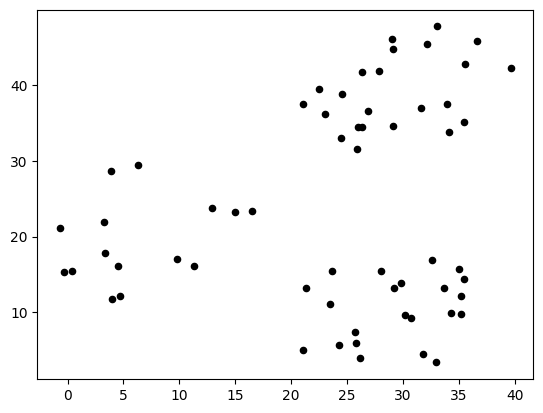

In [6]:
#plot the data to see what it looks like
plt.scatter(data[:,0],data[:,1], c='black' ,s=20)

In [7]:
# import random
# import matplotlib.pyplot as plt

# # Generate sample data
# data = []
# for _ in range(20):
#     x = random.uniform(0, 10)
#     y = random.uniform(0, 10)
#     data.append([x, y])

# # Extract x and y coordinates from data
# x_coords = [point[0] for point in data]
# y_coords = [point[1] for point in data]

# # Plot the data
# plt.scatter(x_coords, y_coords)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Sample Data')
# plt.show()


In [8]:
# print(data)
# sample_data = np.array(data,int)
# sample_data

In [9]:
# #plot sample data
# plt.scatter(sample_data[:,0],sample_data[:,1],c='blue',label='unclustered data')

In [10]:
# #Step 1:Place K random centroids
# centroids={}
# k=3
# for i in range(k):
#     centroids[i+1]=[np.random.randint(0,10),np.random.randint(0,10)]

# #plot the centroids
# plt.scatter(sample_data[:,0],sample_data[:,1],c='black',label='unclustered data')
# colmap={1:'r',2:'g',3:'b'}
# for i in centroids.keys():
#     plt.scatter(*centroids[i],color=colmap[i])
# plt.xlim(0,10)
# plt.ylim(0,10)
# plt.show()





### Helper Functions

#### Distance Function

In [11]:
def get_distance1(a,b):
    return np.sqrt(np.sum((a-b)**2))

def get_abs_distance(a,b):
    a_arr = np.array(a)
    b_arr = np.array(b)
    return np.sum(np.abs(a_arr-b_arr))

def get_distance(a, b):
    a_arr = np.array(a)
    b_arr = np.array(b)
    return np.sqrt(np.sum((a_arr - b_arr)**2))


##### Initialize Centroids

#### Random Centroid Generator

In [12]:
#This formula will help us generate random centroids within the range of the data points
def random_sample(low,high):
    return low + (high - low) * random.random()

In [13]:
#This funtion will initialize the centroids randomly
def initialize_centroids(data,k):
    #Let first get the range of the data i.e range of x and y coordinates
    x_min = y_min = float('inf')
    x_max = y_max = float('-inf')
    for point in data:
        x_min = min(x_min, point[0])
        y_min = min(y_min, point[1])
        x_max = max(x_max, point[0])
        y_max = max(y_max, point[1])

    #Now we have the range of the data so we can randomly initialize the centroids in this range
    centroids=[]
    for i in range(k):
        centroids.append([random_sample(x_min,x_max),
                          random_sample(y_min,y_max)])
    #Now finaly we will return the centroids
    return centroids

#### Get Labels for Data Points

In [14]:
def get_labels(data,centroids):
    #This funtion will assign the data points to the closest centroids
    labels=[]

    for point in data:
        min_dist = float('inf')
        label = None
        
        for i,centroid in enumerate(centroids):
            new_dist = get_abs_distance(point,centroid)
            if new_dist < min_dist:
                min_dist = new_dist
                label = i
        labels.append(label)
        
    return labels


#### Update centroids

In [15]:
def update_centroids(data,labels,k):
    #This funtion will update the centroids of the clusters
    new_centroids = [[0,0] for i in range(k)]
    counts = [0] * k

    for point,label in zip(data,labels):
        new_centroids[label][0] += point[0]
        new_centroids[label][1] += point[1]
        counts[label] += 1

    for i,(total_x,total_y) in enumerate(new_centroids):
        new_centroids[i] = [total_x/counts[i],total_y/counts[i]]

    return new_centroids

#### Stoping Criteria

In [16]:
def should_stop(old_centroids,centroids,threshold = 1e-4):
    total_distance = 0
    for old_c , new_c in zip(old_centroids,centroids):
        total_distance = total_distance + get_abs_distance(old_c , new_c)
    return total_distance < threshold

#### Main Function

In [17]:
#This funtion will retun the labels and clusters to which the data point belongs to
def main(data,k):

    #Step 1:Initalize K random centroids
    centroids= initialize_centroids(data,k)
    print(f"printing 1st set of centroids {centroids}")
    
    i = 1
    while True:
        old_centroids=centroids

        #Step 2:Assign all the points to the closest cluster centroid
        labels= get_labels(data,centroids)
        print(f"printing labels set no. {i} : {labels}")
        
    
        #Step 3:Find new centroids of the clusters
        centroids=update_centroids(data,labels,k)
        print(f"printing {i} set of updated centroids {centroids}")
        i = i + 1

        #Step 4:Check if the centroids have converged
        if should_stop(old_centroids,centroids):
            break

    return labels,centroids






In [18]:
type(data)

numpy.ndarray

printing 1st set of centroids [[24.889369614723257, 17.003007278276165], [31.58727113521957, 5.32568939591035], [8.501839129643864, 19.824166882903587]]
printing labels set no. 1 : [0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1]
printing 1 set of updated centroids [[28.93751612903226, 32.684677419354834], [30.159285714285716, 8.17542857142857], [6.322866666666667, 19.5598]]
printing labels set no. 2 : [0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1]
printing 2 set of updated centroids [[29.304956521739125, 39.05078260869565], [29.33086363636364, 10.432409090909093], [6.322866666666667, 19.5598]]
printing labels set no. 3 : [0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2

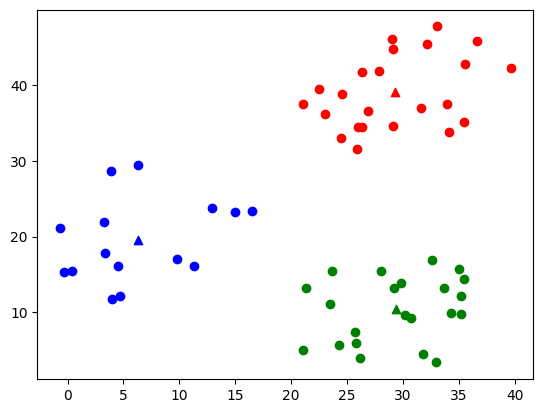

In [21]:
#call the main funtion and plot the data with the diffrent clusters colours
labels,centroids=main(data,3)
colmap={1:'r',2:'g',3:'b'}
#plot the data and centroids

for i in range(len(data)):
    plt.scatter(data[i][0],data[i][1],color=colmap[labels[i]+1])


# Plot the centroids with a different shape (e.g., 'x')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='^', color=colmap[i+1])

plt.show()




In [22]:
print(labels)
print(centroids)

[0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1]
[[29.304956521739125, 39.05078260869565], [29.33086363636364, 10.432409090909093], [6.322866666666667, 19.5598]]


###### Time To Think
Why we did not chose some points from the dataset as centroids?
How doing so will be baised?

Hint : its related to "density of data points"

Answer : 




